In [1]:
from cmeutils.sampling import is_equilibrated, equil_sample

import matplotlib.pyplot as plt
import numpy as np
import signac

import unyt as u
from scipy.stats import sem

# Matplotlib RC Params:    
color_dict = {1.0: "#0F0E0F", 0.8: "#666666", 0.7: "#964d4d", 0.6: "#d03f3f"}
symbol_dict = {1.0: "o", 0.8: "s", 0.7: "^", 0.6: "d"}
pair_symbol_dict = {"E-E": "o", "K-K": "s", "E-K": "^"}
pair_colors = {"E-E": "#00A866", "K-K": "#008EA8", "E-K": "#F5AD18"}
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 7
plt.rcParams['lines.markersize'] = 1
plt.rcParams["lines.linestyle"] = "-"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["legend.markerscale"] = 3

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.


In [2]:
project = signac.get_project("../coarse-grain-sims/specific_vol/polybinder-flow/")

In [ ]:
for job in project.find_jobs(doc_filter={"done": True}):
    try:
        if job.doc.vol_sampled:
            continue
    except:
        pass
    data = np.genfromtxt(job.fn("sim_traj.txt"), names=True)
    pe = data["mdcomputeThermodynamicQuantitiespotential_energy"]
    vol = data["mdcomputeThermodynamicQuantitiesvolume"]
    is_equil = is_equilibrated(vol[-10000:],threshold_fraction=0.50, threshold_neff=200)[0]
    if is_equil:
        sample = equil_sample(vol[-10000:], threshold_fraction=0.50, threshold_neff=200)[0]
        sample_ang = sample * (job.doc.ref_distance**3)*u.angstrom**3
        sample_cm = sample_ang.to("cm**3")
        job.doc.vol_red = np.mean(sample)
        job.doc.vol_red_std = np.std(sample)
        vol_ang = job.doc.vol_red * (job.doc.ref_distance**3)*u.angstrom**3
        vol_cm = vol_ang.to("cm**3")
        job.doc.vol_cm = vol_cm
        job.doc.vol_cm_std = np.std(sample_cm)
        job.doc.vol_cm_sem = sem(sample_cm)
        job.doc.vol_sampled = True
    else:
        job.doc.vol_sampled = False
        print(job.id)

In [ ]:
for job in project.find_jobs(doc_filter={"done": True}):
    job.doc.avg_density = job.doc.mass_g / job.doc.vol_cm

In [6]:
for kT, jobs in project.find_jobs(
    filter={"cg_potentials_dir": "msibi-deep", "ekk_weight": 1.0},
    doc_filter={"done": True}).groupby("kT_quench"):
    for job in jobs:
        print(job)

edf94d6736185bdf3e5ebf49d5390c2b
4e16a1501e8ea9154371536f86e85083
deef70910cc8d82a1a28de3291299f17
57074793a72be1df618700f2cde04702
a5591f31e3f230157260b078d5acf652
d6dca4d338d103844ff0053352649348
5d65c792e2f7415c9a7d2b698369ac66
616b02246116568315f237171576a983
484eba5740aa4a3d1d2eceabcde46bc0
0c6107d91d5ece774ce223bde71720f9
5aaf1e9703ede4896b406fe88a7387c2
0246c1cc4eb8d05664c095720b198627
e0ec9913c3010b0bbb98b161a7afbc2d
489f7192f011f34fa657cbbbe7f091bb
17485dff00d2b2e8b5ac07e145380c49
898bc49fe991618d1d5858a4b5de87d4
6b1fb0c08275179f06173c2bb763f032
497050ea23ad54df1fdacf87d1710aad
975a9a2b7adf26e59ca134ace0c267c8


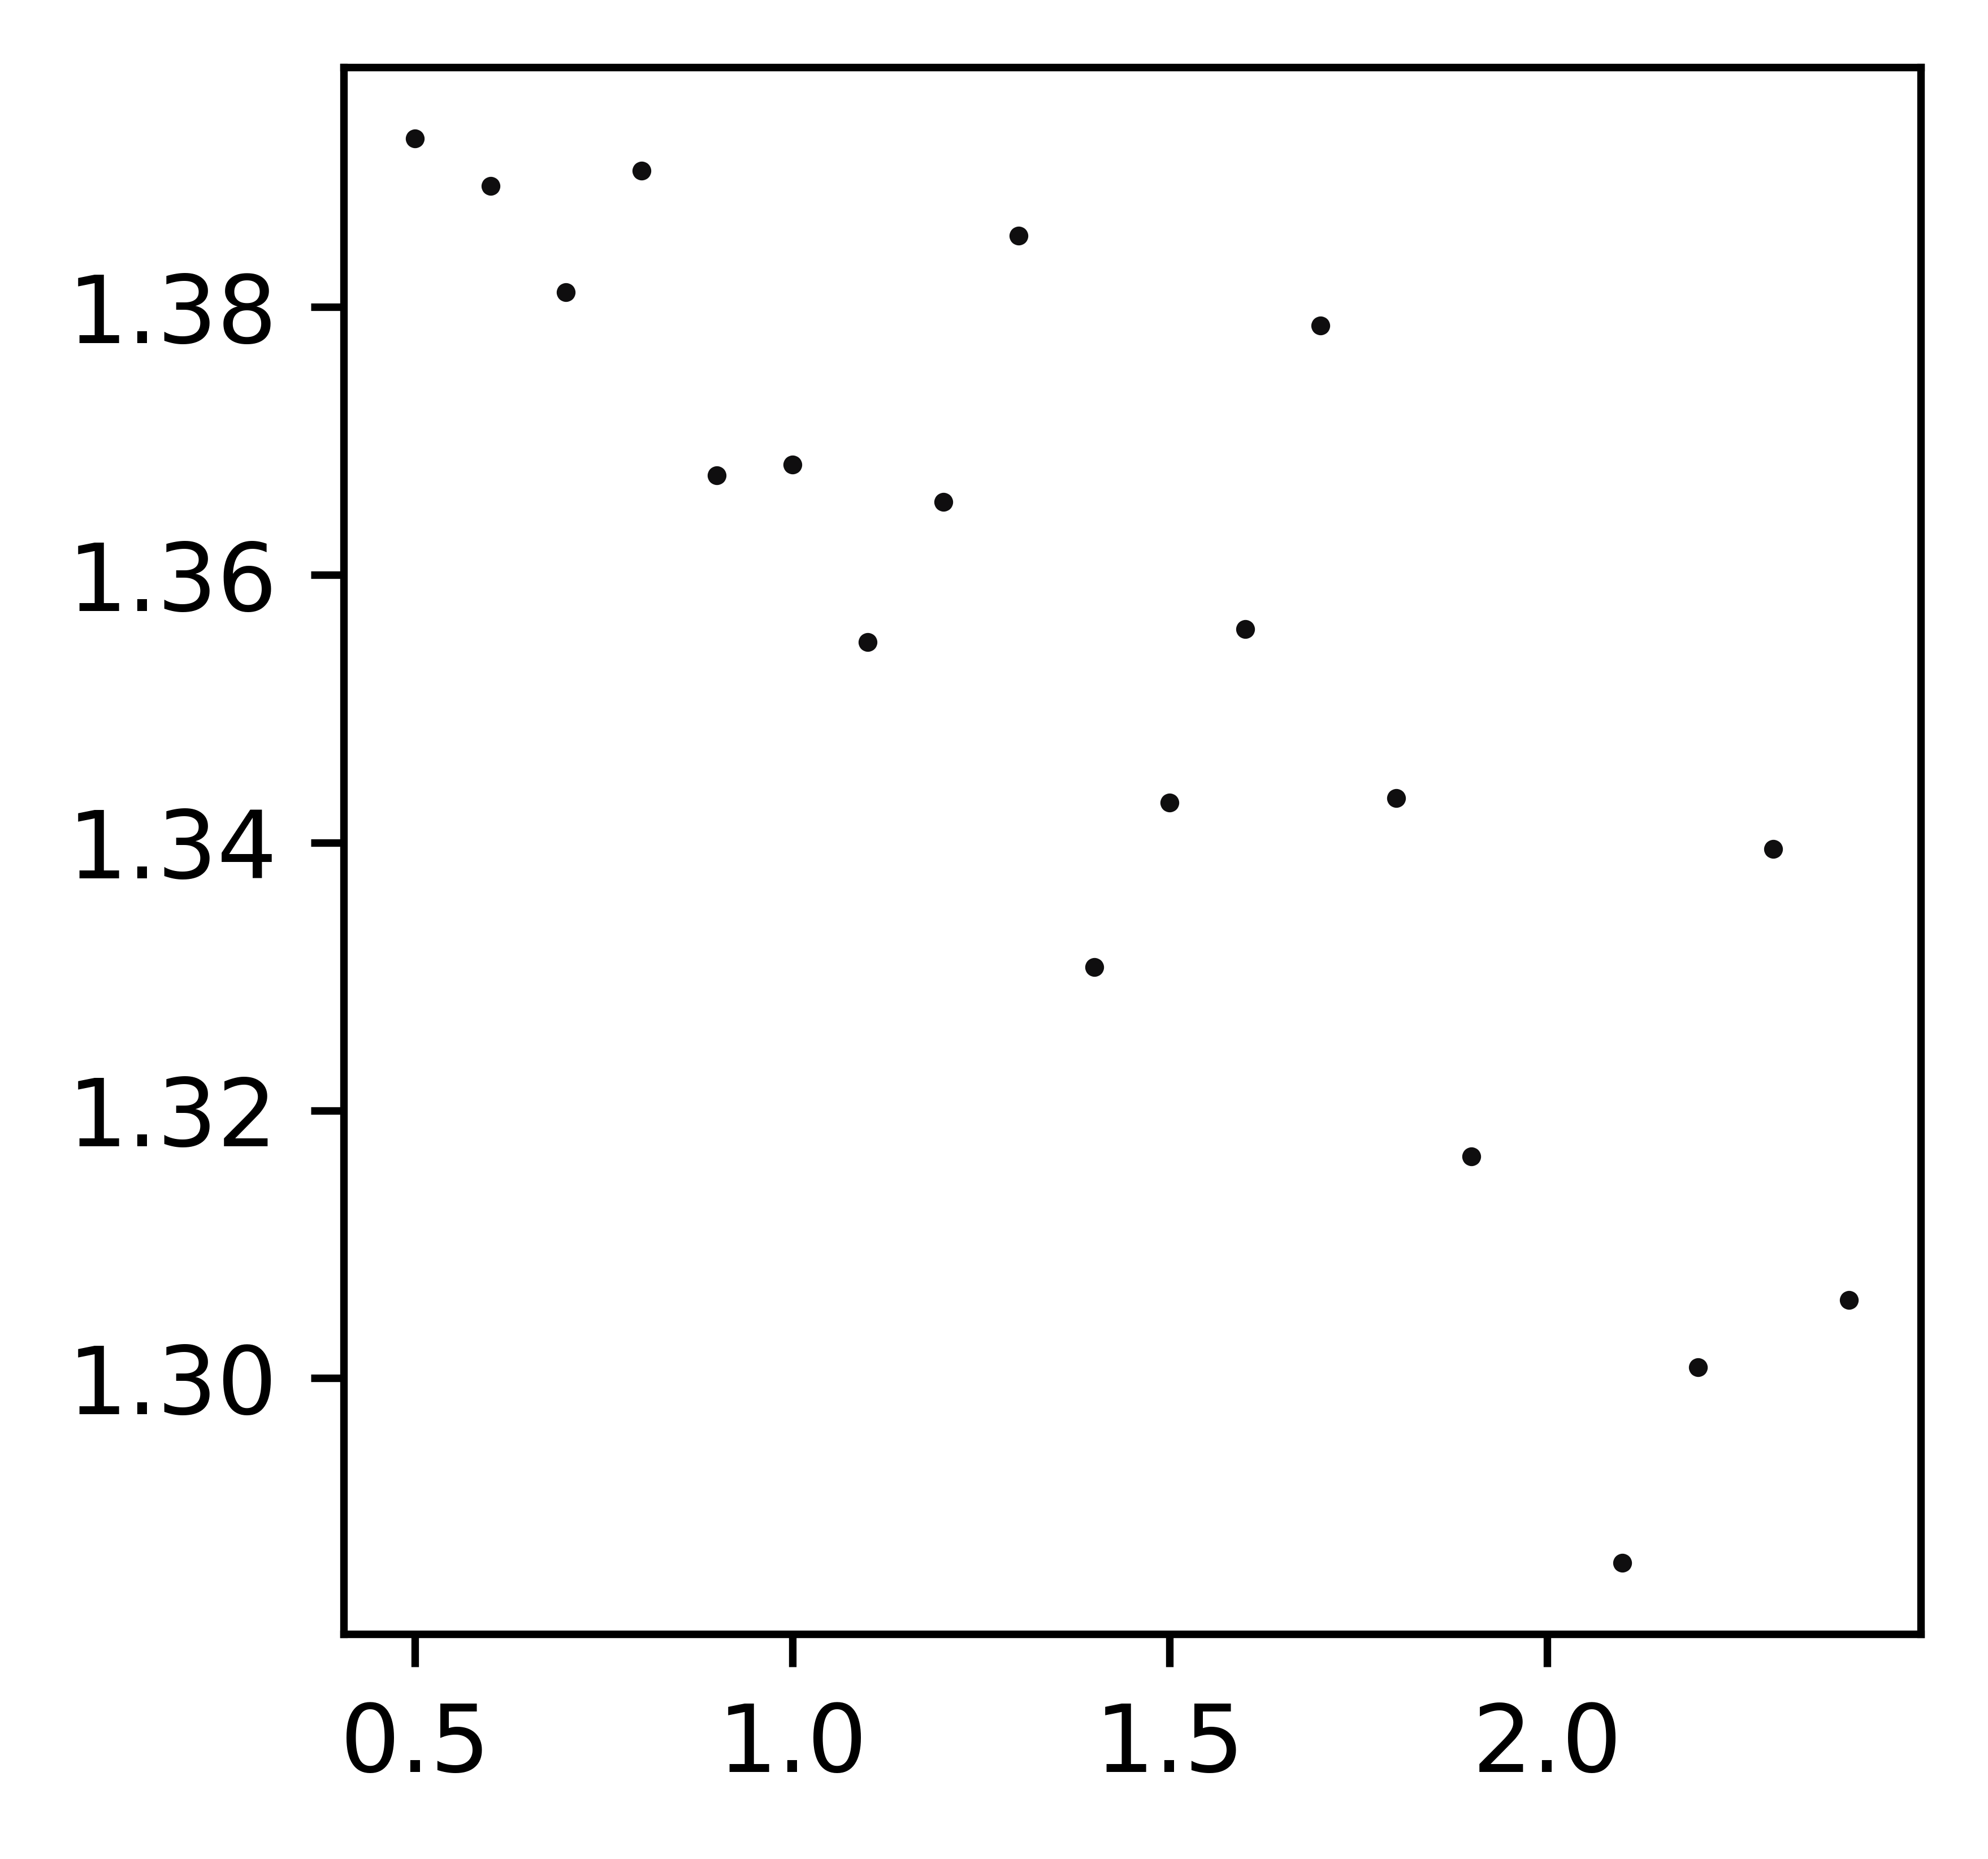

In [7]:
for kT, jobs in project.find_jobs(
    filter={"cg_potentials_dir": "msibi-deep", "ekk_weight": 1.0},
    doc_filter={"done": True}).groupby("kT_quench"):
    
    for job in jobs:
        try:
            plt.plot(kT, job.doc.avg_density, marker="o", c=color_dict[job.sp.ekk_weight])
        except:
            print(job.id)

plt.show()

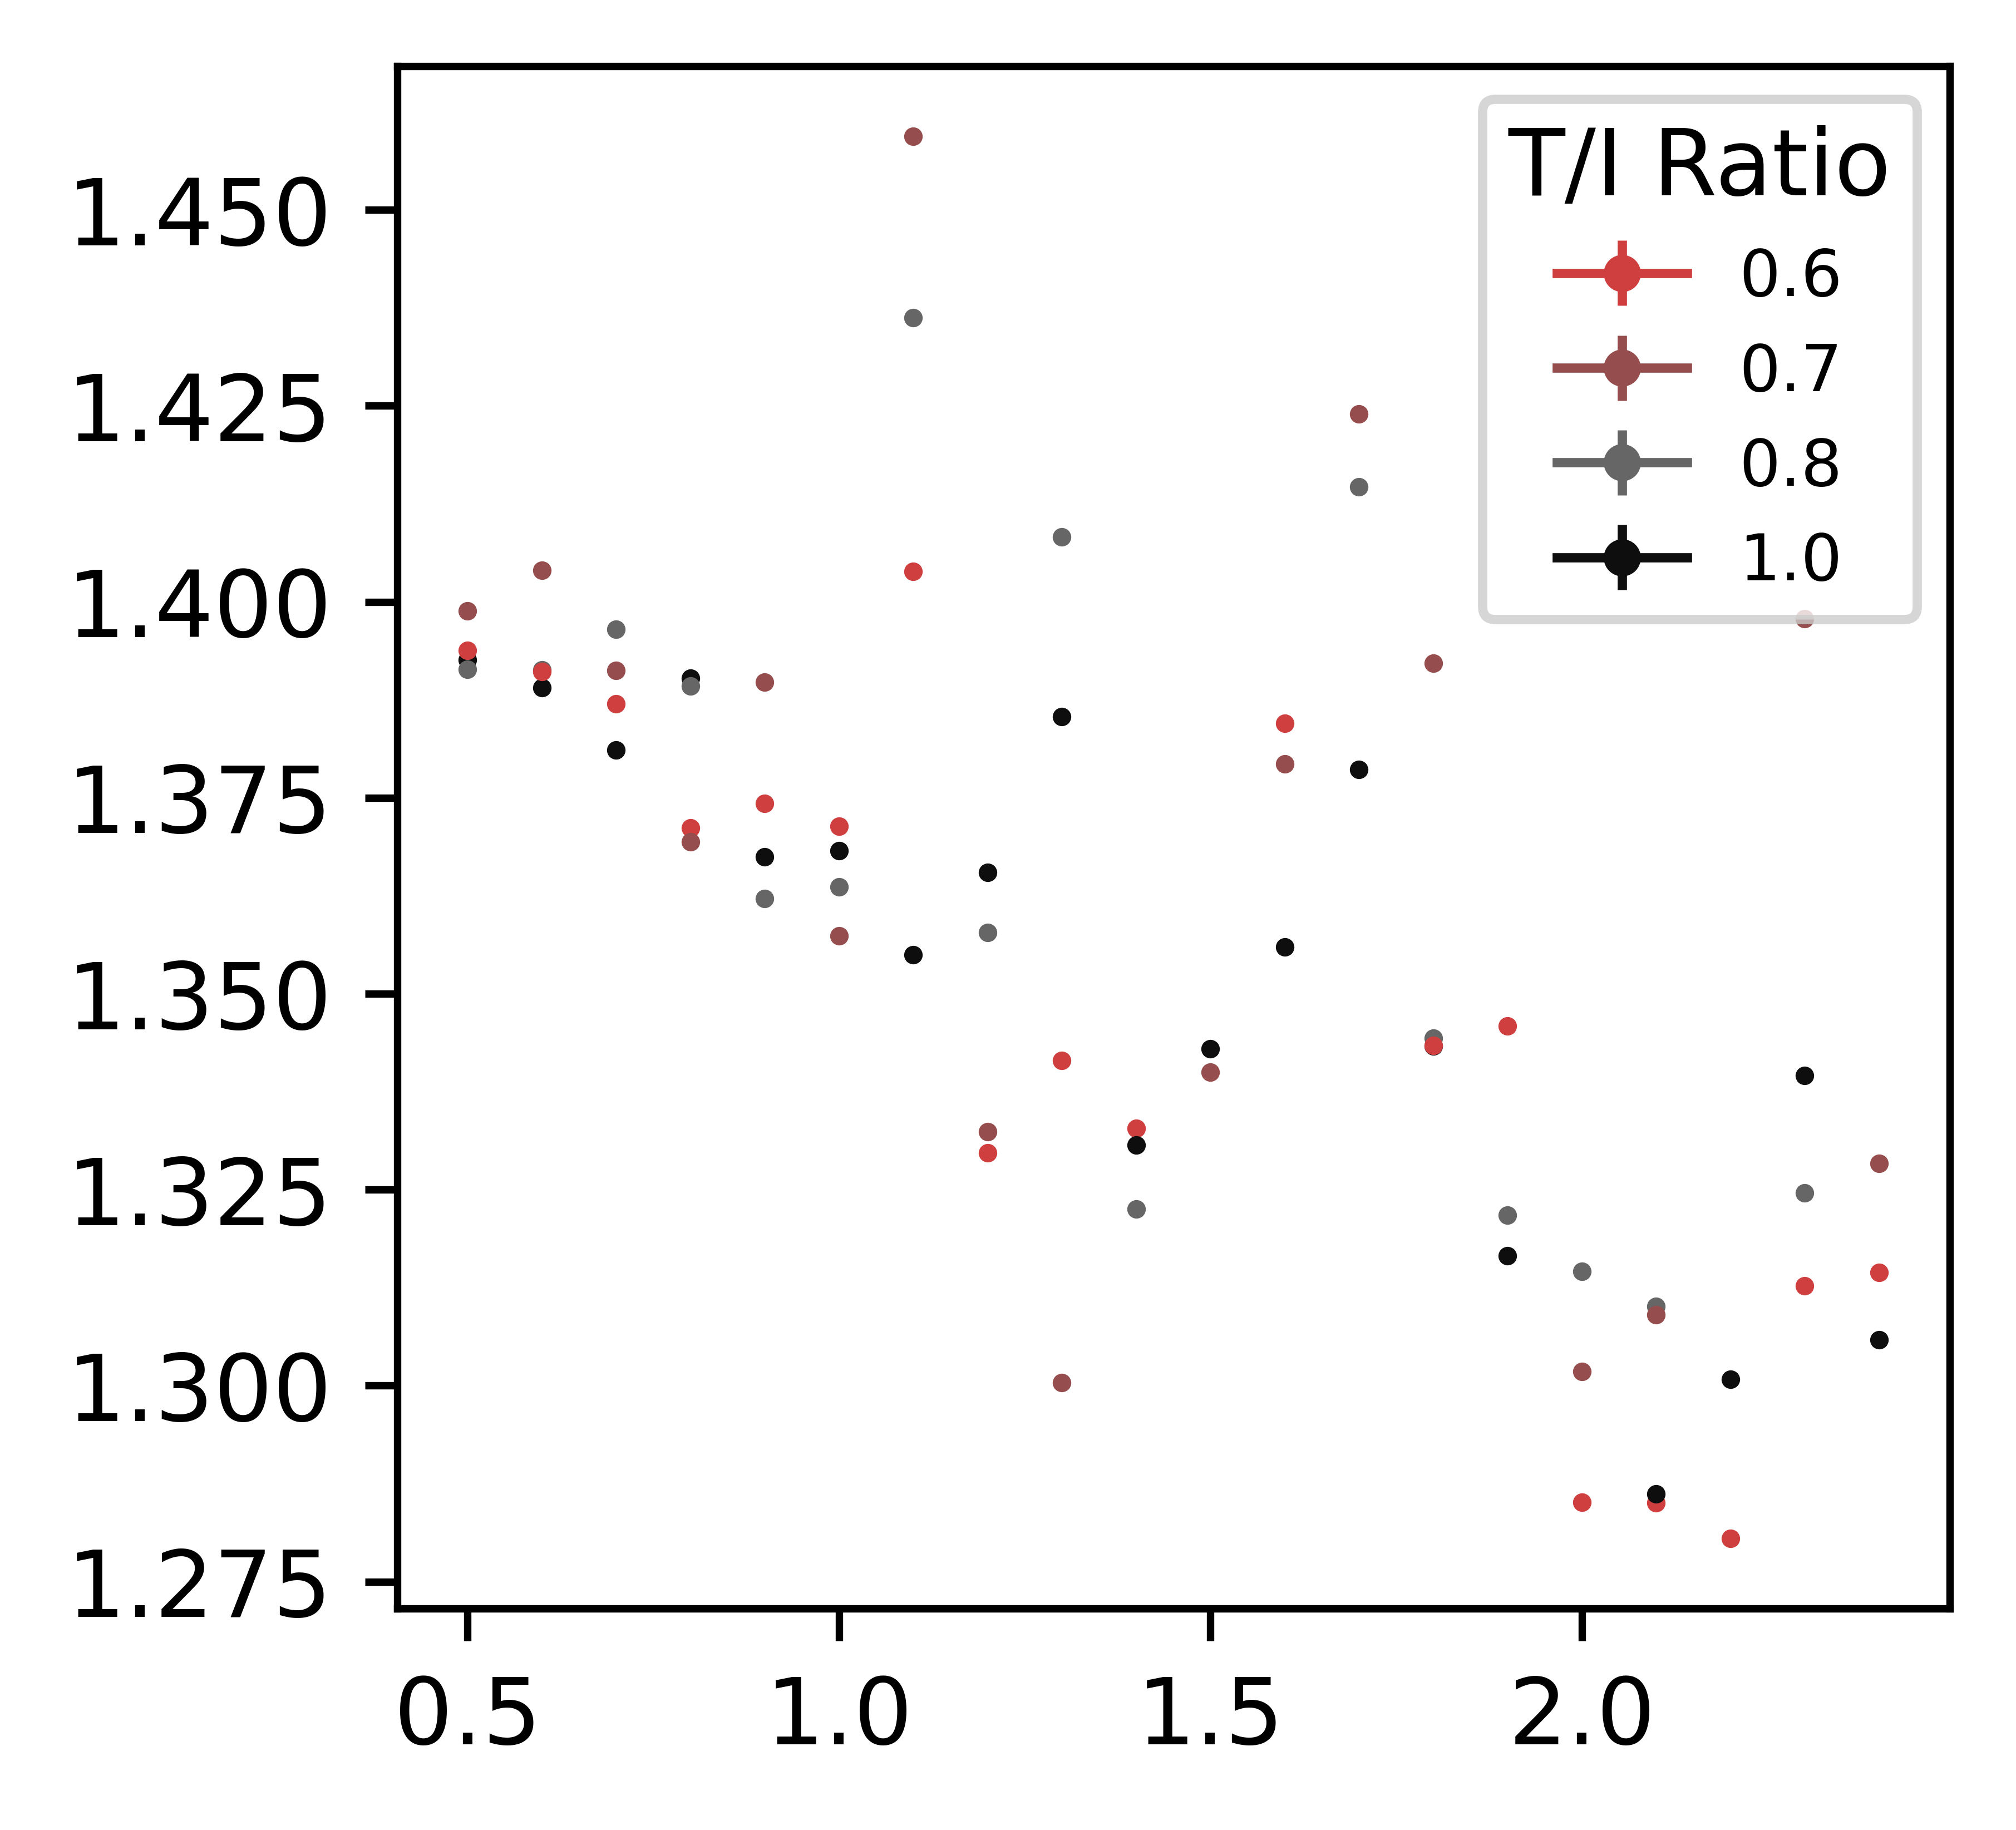

In [11]:
for kT, jobs in project.find_jobs(
    doc_filter={"done": True}).groupby("kT_quench"):
    for job in jobs:
        try:
            plt.errorbar(
                x=kT,
                y=job.doc.mass_g/job.doc.vol_cm,
                #yerr=job.doc.vol_cm_std/job.doc.mass_g,
                yerr=0,
                marker="o",
                color=color_dict[job.sp.ekk_weight],
                label=job.sp.ekk_weight
            )
        except:
            print(job.id)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ratios = sorted(list(set(labels)))
handles = [by_label[ratio] for ratio in ratios]
plt.legend(handles, ratios, loc="upper right", title="T/I Ratio")
plt.show()

In [ ]:
job.sp

In [ ]:
project.detect_schema()

In [ ]:
import mbuild as mb

In [ ]:
comp = mb.load("c1ccc(Oc2ccc(C(=O)c3ccc(C(=O))cc3)cc2)cc1", smiles=True)

In [ ]:
comp.mass

In [ ]:
u.Unit("amu") * 1

In [ ]:
mass_amu = comp.mass * u.Unit("amu") * 75 * 15

In [ ]:
for job in project:
    job.doc.mass_g = mass_amu.to("g").value